### Import our modules.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

### Read our datasets. Retrieve necessary information about the sets, e.g. shape, unusable columns.

In [ ]:
# kConf = pd.read_csv('data/kepExoConfirmed.csv')
eConf = pd.read_csv('data/exoConf.csv')
kCumu = pd.read_csv('data/kepExoCumulative.csv')
print('Confirmed dataset shape = '+str(eConf.shape))
print('Cumulative dataset shape = '+str(kCumu.shape))

eConf_missing = eConf.isna().sum()
kCumu_missing = kCumu.isna().sum()

print('Number of missing values in Confirmed Exoplanet dataset columns:')
print(eConf_missing)

print('Number of missing values in Cumulative dataset columns:')
print(kCumu_missing)

Confirmed dataset shape = (2320, 21)
Cumulative dataset shape = (9564, 20)
Number of missing values in Confirmed Exoplanet dataset columns:
tic_id            6
gaia_id           6
pl_orbper        48
pl_radj           0
pl_massj          0
pl_dens         617
pl_orbeccen     766
pl_eqt         1185
pl_trandep     1651
pl_trandur     1337
pl_ratdor      1076
pl_ratror      1183
st_teff         375
st_rad          125
st_mass          63
st_lum         1644
ra                0
dec               0
sy_pmra          19
sy_pmdec         19
sy_dist          46
dtype: int64
Number of missing values in Cumulative dataset columns:
kepid                 0
koi_disposition       0
koi_pdisposition      0
koi_period            0
koi_time0bk           0
koi_time0             0
koi_eccen           363
koi_impact          363
koi_duration          0
koi_depth           363
koi_ror             363
koi_prad            363
koi_teq             363
koi_steff           363
koi_slogg           363
koi_srad   

In [4]:
kCumu

kepid koi_disposition koi_pdisposition  koi_score  koi_period  \
0     10797460       CONFIRMED        CANDIDATE      1.000    9.488036   
1     10797460       CONFIRMED        CANDIDATE      0.969   54.418383   
2     10811496       CANDIDATE        CANDIDATE      0.000   19.899140   
3     10848459  FALSE POSITIVE   FALSE POSITIVE      0.000    1.736952   
4     10854555       CONFIRMED        CANDIDATE      1.000    2.525592   
...        ...             ...              ...        ...         ...   
9559  10090151  FALSE POSITIVE   FALSE POSITIVE      0.000    0.527699   
9560  10128825       CANDIDATE        CANDIDATE      0.497    1.739849   
9561  10147276  FALSE POSITIVE   FALSE POSITIVE      0.021    0.681402   
9562  10155286       CANDIDATE        CANDIDATE      0.092  333.486169   
9563  10156110  FALSE POSITIVE   FALSE POSITIVE      0.000    4.856035   

      koi_period_err1  koi_period_err2  koi_time0bk  koi_time0bk_err1  \
0        2.775000e-05    -2.775000e-05   170.538750          0.002160   
1        2.479000e-04    -2.479000e-04   162.513840          0.003520   
2        1.494000e-05    -1.494000e-05   175.850252          0.000581   
3        2.630000e-07    -2.630000e-07   170.307565          0.000115   
4        3.761000e-06    -3.761000e-06   171.595550          0.001130   
...               ...              ...          ...               ...   
9559     1.160000e-07    -1.160000e-07   131.705093          0.000170   
9560     1.780000e-05    -1.780000e-05   133.001270          0.007690   
9561     2.434000e-06    -2.434000e-06   132.181750          0.002850   
9562     4.235000e-03    -4.235000e-03   153.615010          0.005070   
9563     6.356000e-05    -6.356000e-05   135.993300          0.010800   

      koi_time0bk_err2  ...  koi_steff_err2  koi_slogg  koi_slogg_err1  \
0            -0.002160  ...           -81.0      4.467           0.064   
1            -0.003520  ...           -81.0      4.467           0.064   
2            -0.000581  ...          -176.0      4.544           0.044   
3            -0.000115  ...          -174.0      4.564           0.053   
4            -0.001130  ...          -211.0      4.438           0.070   
...                ...  ...             ...        ...             ...   
9559         -0.000170  ...          -166.0      4.529           0.035   
9560         -0.007690  ...          -220.0      4.444           0.056   
9561         -0.002850  ...          -236.0      4.447           0.056   
9562         -0.005070  ...          -128.0      2.992           0.030   
9563         -0.010800  ...          -225.0      4.385           0.054   

      koi_slogg_err2  koi_srad  koi_srad_err1  koi_srad_err2         ra  \
0             -0.096     0.927          0.105         -0.061  291.93423   
1             -0.096     0.927          0.105         -0.061  291.93423   
2             -0.176     0.868          0.233         -0.078  297.00482   
3             -0.168     0.791          0.201         -0.067  285.53461   
4             -0.210     1.046          0.334         -0.133  288.75488   
...              ...       ...            ...            ...        ...   
9559          -0.196     0.903          0.237         -0.079  297.18875   
9560          -0.224     1.031          0.341         -0.114  286.50937   
9561          -0.224     1.041          0.341         -0.114  294.16489   
9562          -0.027     7.824          0.223         -1.896  296.76288   
9563          -0.216     1.193          0.410         -0.137  297.00977   

            dec  koi_kepmag  
0     48.141651      15.347  
1     48.141651      15.347  
2     48.134129      15.436  
3     48.285210      15.597  
4     48.226200      15.509  
...         ...         ...  
9559  47.093819      14.082  
9560  47.163219      14.757  
9561  47.176281      15.385  
9562  47.145142      10.998  
9563  47.121021      14.826  

[9564 rows x 44 columns]

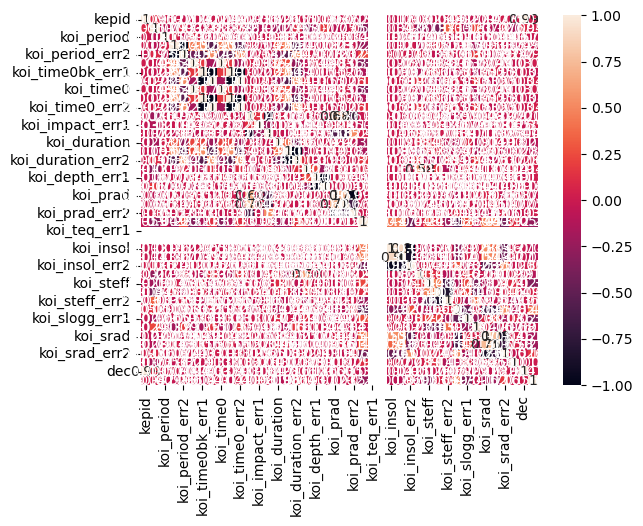

<Figure size 1600x1600 with 0 Axes>

In [3]:
kCumu_corr = kCumu.corr()
# kCumu_corr

sn.heatmap(kCumu_corr, vmin=-1, vmax=1, annot=True)
plt.figure(figsize=(16,16))
plt.show()

In [ ]:
# dropped = ['koi_score', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2',
#           'koi_time0_err1', 'koi_time0_err2', ]